In [1]:
import numpy as np
import os
import pandas as pd
import glob
from matplotlib import cm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
path = "../../data/checkinData"
checkin_records = pd.concat([pd.read_csv(filename, sep='~') for filename in glob.glob(os.path.join(path, "checkin_records/*.csv"))], axis=0)

In [3]:
checkin = pd.concat([pd.read_csv(filename, sep='~') for filename in glob.glob(os.path.join(path, "checkin/*.csv"))], axis=0)

In [4]:
checkin_records.head()

,business_id,date,time,year,month,hour
0,-0RkJ_uIduNLWQrphbADRw,2018-08-30,16:32:18,2018,8,16
1,-0RkJ_uIduNLWQrphbADRw,2018-09-01,19:39:03,2018,9,19
2,-0RkJ_uIduNLWQrphbADRw,2018-09-01,20:37:47,2018,9,20
3,-0RkJ_uIduNLWQrphbADRw,2018-09-10,19:06:42,2018,9,19
4,-0RkJ_uIduNLWQrphbADRw,2018-09-15,18:38:55,2018,9,18


Text(0, 0.5, 'months')

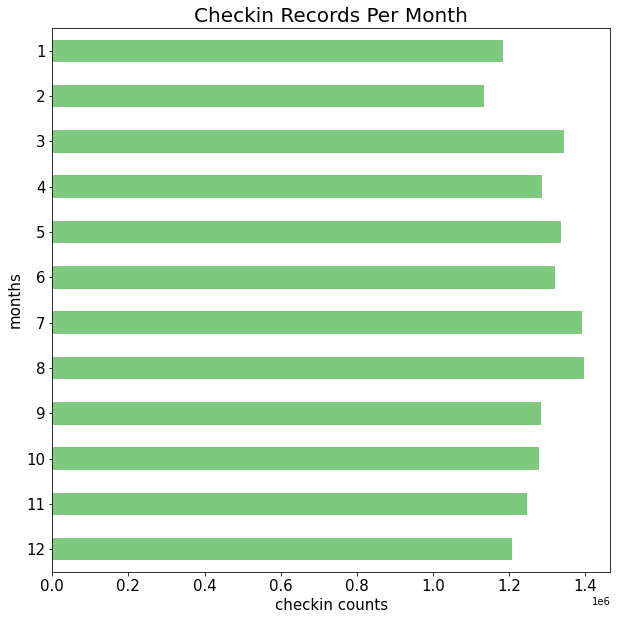

In [5]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
checkin_records['month'].value_counts().sort_index(ascending=False).plot(kind='barh', fontsize=15, colormap=cm.Accent)
ax.set_title('Checkin Records Per Month', fontsize=20)
ax.set_xlabel('checkin counts', fontsize=15)
ax.set_ylabel('months', fontsize=15)

Text(0.5, 0, 'years')

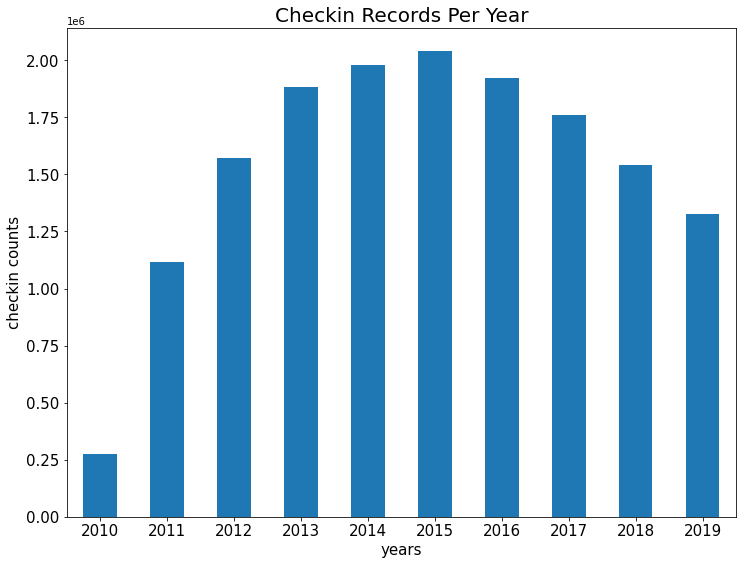

In [6]:
f, ax = plt.subplots(1, 1, figsize = (12, 9))
checkin_records['year'].value_counts().sort_index().plot(kind='bar', fontsize=15, colormap=cm.tab10, rot=0)
ax.set_title('Checkin Records Per Year', fontsize=20)
ax.set_ylabel('checkin counts', fontsize=15)
ax.set_xlabel('years', fontsize=15)

Text(0.5, 0, 'hours')

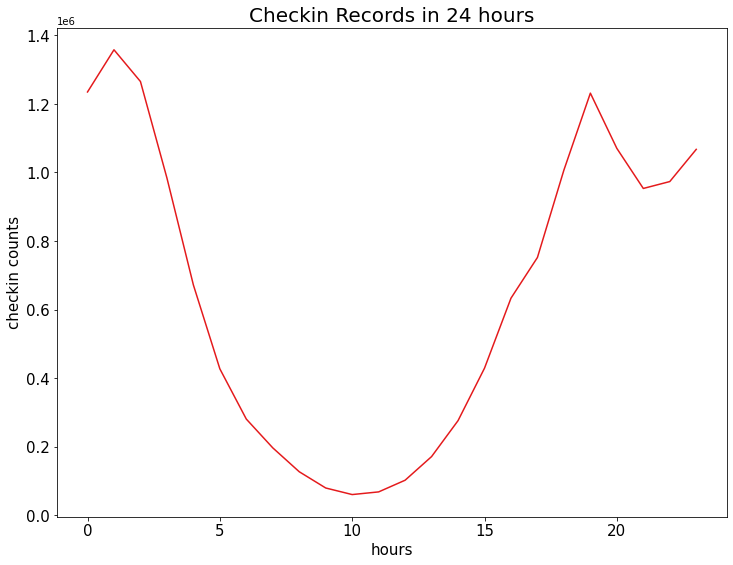

In [7]:
f, ax = plt.subplots(1, 1, figsize = (12, 9))
checkin_records['hour'].value_counts().sort_index().plot( fontsize=15, colormap=cm.Set1, rot=0)
ax.set_title('Checkin Records in 24 hours', fontsize=20)
ax.set_ylabel('checkin counts', fontsize=15)
ax.set_xlabel('hours', fontsize=15)

In [8]:
checkin.head()

,business_id,date,name,address,city,state,postal code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,checkin_count
0,-0NhdsDJsdarxyDPR523ZQ,"2010-05-10 16:10:34, 2011-01-14 18:47:39, 2013...",Akco Lounge,100 King St W,Toronto,ON,NaN,43.649103,-79.380621,3.0,22,0,"{\Alcohol\"":\""u'full_bar'\"",\""Ambience\"":\""{'r...","Korean, Japanese, Restaurants","{\Friday\"":\""11:0-20:30\"",\""Monday\"":\""11:0-21...",24
1,-G7bby_wc7qEKTV31ufDcA,"2015-07-19 23:29:27, 2015-07-20 19:21:57, 2015...",Famous Laffa,"401 Magnetic Drive, Unit 39 - 40",Toronto,ON,NaN,43.783954,-79.472774,4.0,5,0,"{\Alcohol\"":\""'none'\"",\""Ambience\"":\""{'romant...","Kosher, Middle Eastern, Restaurants","{\Friday\"":\""11:0-15:0\"",\""Monday\"":\""11:0-22:...",7
2,-LG_SXZrWLTnfSXRPZQvzA,"2012-05-20 22:06:10, 2012-07-12 00:28:12, 2012...",7-Eleven,5808 Boulder Hwy,Las Vegas,NV,NaN,36.096161,-115.046391,1.0,5,1,"{\BikeParking\"":\""False\"",\""BusinessAcceptsCre...","Coffee & Tea, Convenience Stores, Food","{\Friday\"":\""0:0-0:0\"",\""Monday\"":\""0:0-0:0\"",...",29
3,-YUq9cyBDncEIDf5aUEGhw,"2010-03-19 18:19:12, 2010-11-27 21:52:08, 2011...",Hole 'n One,13573 W Camino Del Sol,Sun City West,AZ,NaN,33.655027,-112.353464,4.0,71,1,"{\Alcohol\"":\""'none'\"",\""Ambience\"":\""{'romant...","Barbeque, Restaurants, Breakfast & Brunch, Ame...","{\Friday\"":\""6:0-20:0\"",\""Monday\"":\""6:0-20:0\...",109
4,05_XQDjulv-TCbqYRIkp3Q,"2010-06-26 00:25:04, 2010-07-17 21:03:32, 2010...",Old Chicago,135 West Ocotillo Rd.,Chandler,AZ,NaN,33.247519,-111.843093,2.5,8,0,"{\Alcohol\"":\""u'full_bar'\"",\""Ambience\"":\""{'r...","Restaurants, Pizza, Food, American (Traditiona...","{\Friday\"":\""11:0-2:0\"",\""Saturday\"":\""11:0-2:...",166


Text(0.5, 0, 'states')

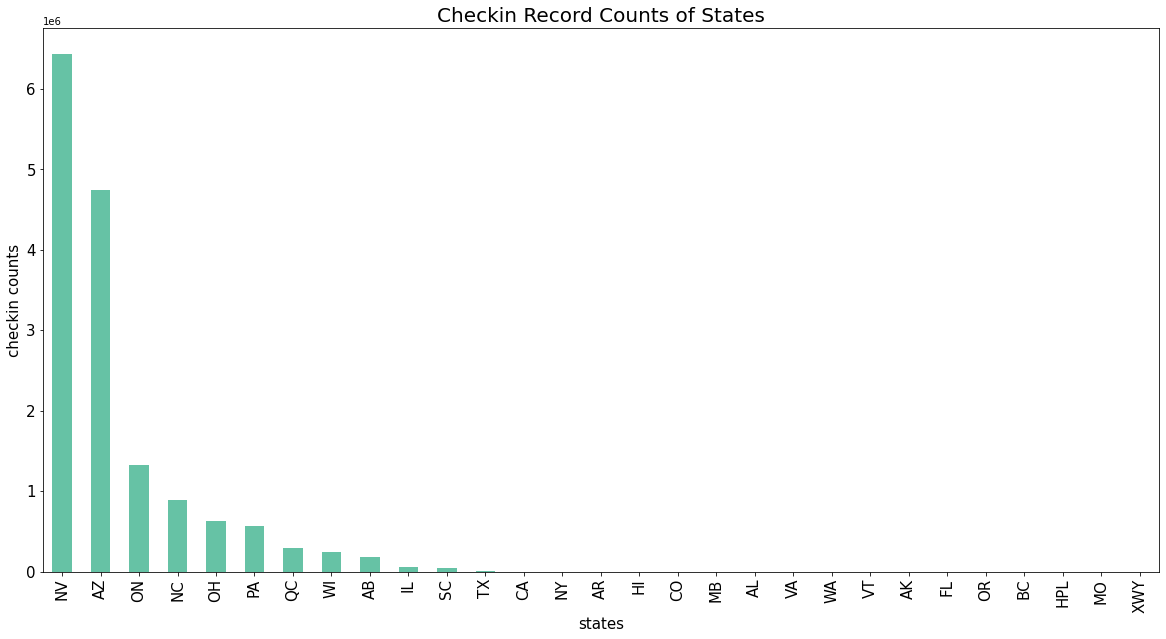

In [9]:
f, ax = plt.subplots(1, 1, figsize = (20, 10))
checkin.groupby('state').sum()['checkin_count'].sort_values(ascending=False).plot(kind='bar', fontsize=15, colormap=cm.Set2)
ax.set_title('Checkin Record Counts of States', fontsize=20)
ax.set_ylabel('checkin counts', fontsize=15)
ax.set_xlabel('states', fontsize=15)

Text(0, 0.5, 'business name')

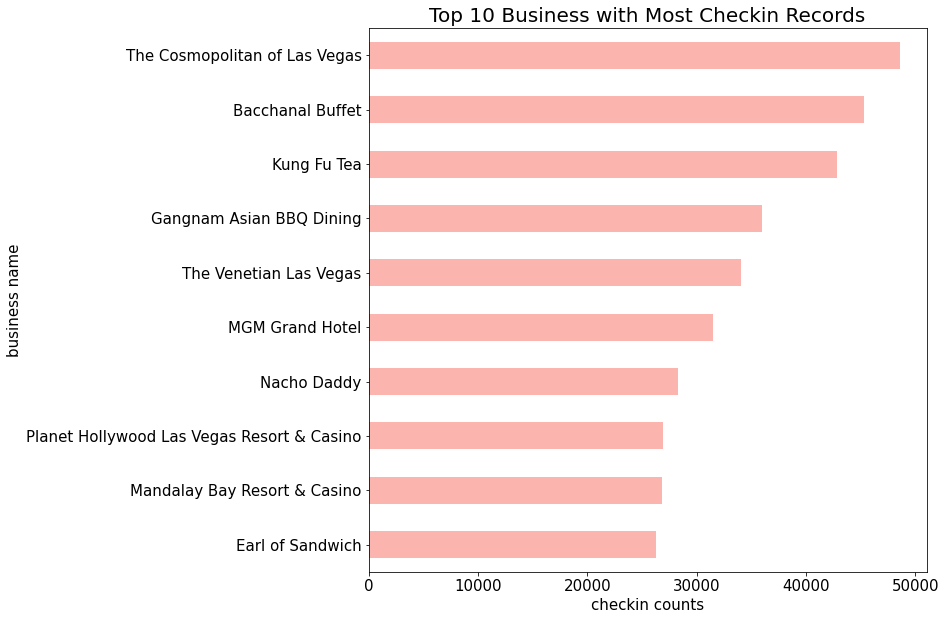

In [10]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
checkin.sort_values('checkin_count', ascending=False)[:10].set_index('name')['checkin_count'].sort_values().plot(kind='barh', fontsize=15, colormap=cm.Pastel1)
ax.set_title('Top 10 Business with Most Checkin Records', fontsize=20)
ax.set_xlabel('checkin counts', fontsize=15)
ax.set_ylabel('business name', fontsize=15)

Text(0, 0.5, '')

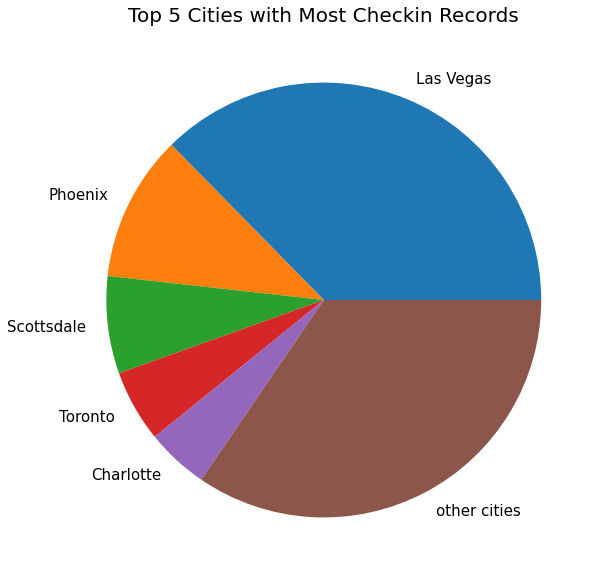

In [11]:
topk = 5
city_checkins = checkin.groupby('city').sum()['checkin_count'].sort_values(ascending=False)
city_checkins = city_checkins[:topk].append(pd.Series({'other cities': city_checkins[topk:].sum()}))
f, ax = plt.subplots(1, 1, figsize = (10, 10))
city_checkins.plot(kind='pie',fontsize=15)
ax.set_title('Top 5 Cities with Most Checkin Records', fontsize=20)
ax.set_ylabel('')